# Preprocessing the Data (Version 2)


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd 

# Import and read the csv
rawDF = pd.read_csv('MLdataB2.csv')
rawDF.head()

,state,brand,spend,impressions,leads,link_clicks,reach,agency
0,CA,B2,40.27,1397,2,17,1320,Agency 2
1,CO,B2,11.05,566,0,2,532,Agency 3
2,TX,B2,16.67,877,0,7,816,Agency 2
3,TN,B2,1.91,85,0,0,83,Agency 3
4,IL,B2,48.36,1533,2,8,1267,Agency 5


In [2]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57656 entries, 0 to 57655
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        57656 non-null  object 
 1   brand        57656 non-null  object 
 2   spend        57656 non-null  float64
 3   impressions  57656 non-null  int64  
 4   leads        57656 non-null  int64  
 5   link_clicks  57656 non-null  int64  
 6   reach        57656 non-null  int64  
 7   agency       57656 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 3.5+ MB


# Rough/Quick Preprocessing Complete

# Binning

In [3]:
# Determine the number of unique values in each column.
# if anything > 10, suggested to inspect further if non-numeric/string value column
rawDF.nunique()
# output shows potential need for binning on: 
# location_name, agency, date_start, campaign_id, state

state            32
brand             1
spend          7840
impressions    4521
leads            32
link_clicks     147
reach          4262
agency            8
dtype: int64

In [4]:
# Look at agency value counts for binning
agencyCnts = rawDF['agency'].value_counts()
agencyCnts

# It may be appropriate to EITHER: 
# 1. Bin Agencies 10-12 as "Other"
# OR 2. Focus on a couple of agencies against each other

Agency 3    30875
Agency 2    17599
Agency 5     3831
Agency 4     1655
Agency 9     1645
Agency 7     1562
Agency 8      383
Agency 6      106
Name: agency, dtype: int64

<AxesSubplot:ylabel='Density'>

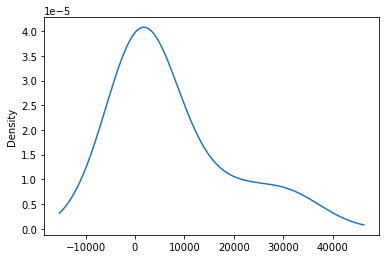

In [5]:
# Visualize the value counts of agencyCnts
agencyCnts.plot.density()

In [6]:
# groupby/left join agency
# value counts from agency

df = rawDF[['agency', 'impressions']]
df = df.groupby(by=['agency']).count()
df

,impressions
agency,
Agency 2,17599
Agency 3,30875
Agency 4,1655
Agency 5,3831
Agency 6,106
Agency 7,1562
Agency 8,383
Agency 9,1645


In [7]:
# merge 
# use concat? 
### ISSUE: other columns not showing up
merge_df2 = pd.merge(rawDF, df, on=['agency'])
merge_df2

,state,brand,spend,impressions_x,leads,link_clicks,reach,agency,impressions_y
0,CA,B2,40.27,1397,2,17,1320,Agency 2,17599
1,TX,B2,16.67,877,0,7,816,Agency 2,17599
2,UT,B2,33.96,1455,0,8,1361,Agency 2,17599
3,TX,B2,32.97,1554,1,4,1446,Agency 2,17599
4,VA,B2,32.00,1326,0,4,1242,Agency 2,17599
...,...,...,...,...,...,...,...,...,...
57651,IN,B2,10.96,336,0,1,296,Agency 6,106
57652,CA,B2,35.91,1852,2,17,1608,Agency 6,106
57653,FL,B2,34.19,1178,1,11,1080,Agency 6,106
57654,CA,B2,35.24,2019,1,14,1825,Agency 6,106


In [8]:
# Determine which values to replace if counts are less than ...?

bins = [0, 500, 1000, 5000, 10000]
labels =['1', '2', '3', '4']


merge_df2['Agency Tiers'] = pd.cut(merge_df2['impressions_y'], bins,labels=labels)
print (merge_df2)


      state brand  spend  impressions_x  leads  link_clicks  reach    agency  \
0        CA    B2  40.27           1397      2           17   1320  Agency 2   
1        TX    B2  16.67            877      0            7    816  Agency 2   
2        UT    B2  33.96           1455      0            8   1361  Agency 2   
3        TX    B2  32.97           1554      1            4   1446  Agency 2   
4        VA    B2  32.00           1326      0            4   1242  Agency 2   
...     ...   ...    ...            ...    ...          ...    ...       ...   
57651    IN    B2  10.96            336      0            1    296  Agency 6   
57652    CA    B2  35.91           1852      2           17   1608  Agency 6   
57653    FL    B2  34.19           1178      1           11   1080  Agency 6   
57654    CA    B2  35.24           2019      1           14   1825  Agency 6   
57655    CA    B2  24.83            918      0            7    834  Agency 6   

       impressions_y Agency Tiers  
0  

In [9]:
# drop impressions y
merge_df2.drop('impressions_y', axis=1, inplace=True)
merge_df2.head()

,state,brand,spend,impressions_x,leads,link_clicks,reach,agency,Agency Tiers
0,CA,B2,40.27,1397,2,17,1320,Agency 2,NaN
1,TX,B2,16.67,877,0,7,816,Agency 2,NaN
2,UT,B2,33.96,1455,0,8,1361,Agency 2,NaN
3,TX,B2,32.97,1554,1,4,1446,Agency 2,NaN
4,VA,B2,32.00,1326,0,4,1242,Agency 2,NaN


In [10]:
df3 = merge_df2.rename(columns={'impressions_x': 'Impressions'})
df3

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
0,CA,B2,40.27,1397,2,17,1320,Agency 2,NaN
1,TX,B2,16.67,877,0,7,816,Agency 2,NaN
2,UT,B2,33.96,1455,0,8,1361,Agency 2,NaN
3,TX,B2,32.97,1554,1,4,1446,Agency 2,NaN
4,VA,B2,32.00,1326,0,4,1242,Agency 2,NaN
...,...,...,...,...,...,...,...,...,...
57651,IN,B2,10.96,336,0,1,296,Agency 6,1
57652,CA,B2,35.91,1852,2,17,1608,Agency 6,1
57653,FL,B2,34.19,1178,1,11,1080,Agency 6,1
57654,CA,B2,35.24,2019,1,14,1825,Agency 6,1


In [11]:
df3.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
15642,TX,B2,31.56,1163,1,11,1084,Agency 2,NaN
36326,TN,B2,28.45,1913,3,19,1747,Agency 3,NaN
51045,AZ,B2,42.07,1593,3,16,1384,Agency 5,3
1440,UT,B2,16.28,1051,1,17,978,Agency 2,NaN
54286,VA,B2,8.96,379,0,1,369,Agency 4,3
6824,IN,B2,32.38,1981,1,19,1837,Agency 2,NaN
14798,WA,B2,64.61,2230,4,18,2097,Agency 2,NaN
40771,MO,B2,14.11,443,0,7,428,Agency 3,NaN
29547,IA,B2,49.89,2210,1,11,2042,Agency 3,NaN
34835,CA,B2,34.27,1481,1,5,1434,Agency 3,NaN


In [12]:
# transform leads column from # of leads to binary, yes or no on a lead success 
# check non nulls
df3['leads'].notnull().astype('int')

0        1
1        1
2        1
3        1
4        1
        ..
57651    1
57652    1
57653    1
57654    1
57655    1
Name: leads, Length: 57656, dtype: int32

In [13]:
df3['leads'].isnull().astype('int')

0        0
1        0
2        0
3        0
4        0
        ..
57651    0
57652    0
57653    0
57654    0
57655    0
Name: leads, Length: 57656, dtype: int32

In [14]:
# change nulls == 0
df3.leads.fillna(0,inplace=True)

In [15]:
# change non nulls == 1 
df3["leads"]=df3["leads"].apply(lambda x: 1 if x!=0 else 0)

In [16]:
df3['leads'].sample(10)

23202    0
26815    1
19164    1
9061     1
25877    1
20890    0
1685     1
32495    0
5309     1
31275    0
Name: leads, dtype: int64

In [17]:
df4=df3.dropna(subset=['leads'])

In [18]:
df4.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
18022,MI,B2,46.05,2732,1,14,2573,Agency 3,NaN
42580,KS,B2,24.24,1474,1,7,1383,Agency 3,NaN
7424,IN,B2,30.88,1382,0,7,1303,Agency 2,NaN
10606,TX,B2,26.10,948,1,1,883,Agency 2,NaN
51896,IL,B2,32.19,1243,1,8,1134,Agency 5,3
40206,NC,B2,31.19,1537,1,40,1434,Agency 3,NaN
51563,CA,B2,35.03,1923,1,74,1692,Agency 5,3
40516,OH,B2,16.12,793,1,3,746,Agency 3,NaN
39796,MD,B2,50.48,1939,0,38,1676,Agency 3,NaN
24624,MO,B2,15.61,647,0,4,619,Agency 3,NaN


In [19]:
# export as csv
#df4.to_csv('ca_df_leads.csv')

### OptBinning for leads predict on bins for state

In [20]:
# use optbinning advanced binning
from optbinning import OptimalBinning as ob

In [21]:
variable = "leads"
x = df3['spend'].values
y = df3.leads

In [22]:
optb = ob(name=variable, dtype="numerical", solver="cp")

In [23]:
optb.fit(x, y)

OptimalBinning(name='leads')

In [24]:
binning_table = optb.binning_table

In [25]:
type(binning_table)

optbinning.binning.binning_statistics.BinningTable

In [26]:
binning_table.build()
### What does it mean: 
# Bin: the intervals delimited by the optimal split points.
# Count: the number of records for each bin.
# Count (%): the percentage of records for each bin.
# Non-event: the number of non-event records (y=0) for each bin.
# Event: the number of event records (y=1) for each bin.
# Event rate: the percentage of event records for each bin.
# WoE: the Weight-of-Evidence for each bin.
# IV: the Information Value (also known as Jeffrey’s divergence) for each bin.
# JS: the Jensen-Shannon divergence for each bin.

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 5.13)",5337,0.092566,5166,171,0.032040,3.975145,0.965594,0.075823
1,"[5.13, 10.09)",4168,0.072291,3000,1168,0.280230,1.510274,0.169168,0.019341
2,"[10.09, 13.30)",2947,0.051114,1734,1213,0.411605,0.924289,0.046326,0.005593
3,"[13.30, 15.93)",2913,0.050524,1335,1578,0.541710,0.399728,0.008426,0.001046
4,"[15.93, 20.96)",5539,0.096070,2165,3374,0.609135,0.123276,0.001483,0.000185
5,"[20.96, 24.57)",3477,0.060306,1205,2272,0.653437,-0.067226,0.000270,0.000034
6,"[24.57, 30.39)",3431,0.059508,1010,2421,0.705625,-0.307276,0.005350,0.000666
7,"[30.39, 32.18)",5230,0.090710,1335,3895,0.744742,-0.503808,0.021111,0.002611
8,"[32.18, 37.43)",7734,0.134140,1598,6136,0.793380,-0.778465,0.070231,0.008564
9,"[37.43, 49.19)",8100,0.140488,1358,6742,0.832346,-1.035389,0.122373,0.014648


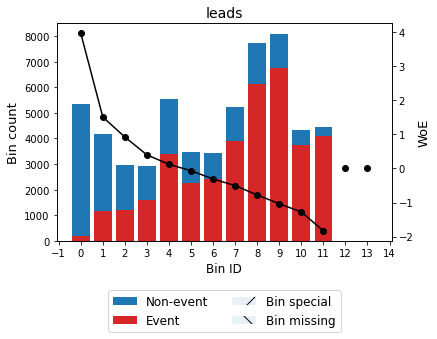

In [27]:
binning_table.plot(metric="woe")
# woe = inversely related to event rate, weight of evidence for each bin
# shows impression on y axis in thousands
# woe on right 
# bins on bottom 

### Binning check on all columns

In [28]:
# use scorecard advanced binning
# https://pypi.org/project/scorecardpy/
import scorecardpy as sc

In [29]:
bins = sc.woebin(df3, y="leads")

[INFO] creating woe binning ...


C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\scorecardpy\condition_fun.py:19: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: brand)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [ ]:
# plot the bins
sc.woebin_plot(bins)
# need to reformat to read plots easily

### quick observation---Plots with highest IV value = most likley to predict successfully on leads
# state (.05), agency (.03), spend (.002) seem most promising

### Drop for split

In [34]:
df4.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
38102,CO,B2,31.52,1662,1,28,1557,Agency 3,NaN
47708,IL,B2,29.69,1237,1,12,1200,Agency 3,NaN
33440,CA,B2,16.44,552,1,7,540,Agency 3,NaN
32705,MO,B2,16.26,927,0,6,895,Agency 3,NaN
55304,VA,B2,17.37,794,0,6,777,Agency 4,3
46465,TX,B2,16.93,500,1,5,482,Agency 3,NaN
52266,FL,B2,50.57,1894,1,7,1753,Agency 5,3
27966,CA,B2,13.03,783,1,5,750,Agency 3,NaN
11562,TX,B2,32.27,1141,0,2,1060,Agency 2,NaN
25544,NJ,B2,31.38,1381,1,7,1334,Agency 3,NaN


In [35]:
# check current df and keep only: 
# state tiers, agency tiers, spend, Impressions, brand
# target = leads
model_df1 = df4.drop(columns=['agency', 'state', 'brand'])

In [36]:
model_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57656 entries, 0 to 57655
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   spend         57656 non-null  float64 
 1   Impressions   57656 non-null  int64   
 2   leads         57656 non-null  int64   
 3   link_clicks   57656 non-null  int64   
 4   reach         57656 non-null  int64   
 5   Agency Tiers  9182 non-null   category
dtypes: category(1), float64(1), int64(4)
memory usage: 2.7 MB


### Encoding

In [37]:
# generagte cat variables
# Generate our categorical variable lists
application_cat = model_df1.dtypes[model_df1.dtypes == "object"].index.tolist()

In [38]:
# one hot encoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# create new df before merging later
encoded_df = pd.DataFrame(enc.fit_transform(model_df1[application_cat]))

# Add the encoded variable names to the dataframe
encoded_df.columns = enc.get_feature_names(application_cat)
encoded_df.head()

""
0
1
2
3
4


In [39]:
# merge dfs
model_df1_official = model_df1.merge(encoded_df, left_index=True, right_index=True)
model_df1_official = model_df1.drop(application_cat, 1)
model_df1_official.head()

C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,spend,Impressions,leads,link_clicks,reach,Agency Tiers
0,40.27,1397,1,17,1320,NaN
1,16.67,877,0,7,816,NaN
2,33.96,1455,0,8,1361,NaN
3,32.97,1554,1,4,1446,NaN
4,32.00,1326,0,4,1242,NaN


In [40]:
model_df1_official.to_csv('b1_df.csv')